In [59]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
#NOTE: YOU HAVE TO USE YOUR OWN API KEY
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-08T06:00:34.663Z', 'error_code': 1001, 'error_message': 'This API Key is invalid.', 'elapsed': 0, 'credit_count': 0}}


In [2]:
import pandas as pd
#display and see all the columns
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [3]:
#normalizes the data and makes it look nicer in a dataframe
df = pd.json_normalize(data['data'])

#add a new column called timestamp and set it to NOW
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10540,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953624e+07,1.953624e+07,False,NaN,1,NaN,NaN,None,2023-11-08T05:15:00.000Z,35337.014329,1.848143e+10,45.4882,0.101430,1.333982,2.703948,26.487497,36.608296,19.800813,6.903525e+11,51.7600,7.420773e+11,None,2023-11-08T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
1,1027,Ethereum,ETH,ethereum,7731,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202677e+08,1.202677e+08,True,NaN,2,NaN,NaN,None,2023-11-08T05:15:00.000Z,1884.817504,8.318930e+09,-1.3387,0.080278,-0.319806,4.388800,15.372272,15.370404,1.903374,2.266827e+11,16.9976,2.266827e+11,None,2023-11-08T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
2,825,Tether USDt,USDT,tether,65242,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.608708e+10,8.862366e+10,True,NaN,3,NaN,NaN,None,2023-11-08T05:14:00.000Z,1.000491,3.522617e+10,18.7975,-0.001173,0.005782,0.018484,0.013329,0.067698,0.145100,8.612934e+10,6.4595,8.866716e+10,None,2023-11-08T05:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-08 13:16:14.236481
3,1839,BNB,BNB,bnb,1746,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517025e+08,1.517025e+08,False,NaN,4,NaN,NaN,None,2023-11-08T05:14:00.000Z,245.138938,5.225259e+08,-4.3204,-0.219667,-2.394815,8.859809,15.622746,14.068917,0.863683,3.718819e+10,2.7887,3.718819e+10,None,2023-11-08T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-08T05:15:00.000Z,0.682867,2.277695e+09,-32.2348,-0.479407,-0.013066,16.155663,31.917826,35.862111,7.175565,3.661248e+10,2.7454,6.828669e+10,None,2023-11-08T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
5,3408,USDC,USDC,usd-coin,14813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.442523e+10,2.442523e+10,False,NaN,6,NaN,NaN,None,2023-11-08T05:14:00.000Z,1.000037,4.155943e+09,10.9434,0.007085,-0.006641,0.002662,0.010911,-0.012382,0.009316,2.442612e+10,1.8319,2.442612e+10,None,2023-11-08T05:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-08 13:16:14.236481
6,5426,Solana,SOL,solana,544,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.209010e+08,5.619458e+08,True,NaN,7,NaN,NaN,None,2023-11-08T05:15:00.000Z,43.352833,1.689971e+09,59.2357,-0.178900,5.393707,13.309675,85.637325,121.521271,79.274774,1.824725e+10,1.3685,2.436194e+10,None,2023-11-08T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
7,2010,Cardano,ADA,cardano,965,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.525856e+10,3.633522e+10,False,NaN,8,NaN,NaN,None,2023-11-08T05:14:00.000Z,0.354160,4.123207e+08,-6.0936,-0.265588,-0.414074,23.074510,36.997188,38.821779,18.241711,1.248718e+10,0.9365,1.593722e+10,None,2023-11-08T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-08 13:16:14.236481
8,74,Dogecoin,DOGE,dogecoin,821,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.417409

In [4]:
#AUTOMATING THE API PULL
def crypto_api():

    #declaring df as global variable
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9436294f-ced6-4a9d-8b86-1a100979e5df',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #append the new df2 to the original df
    df2 = pd.json_normalize(data['data'])
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2, df_append])



    #normalizes the data and makes it look nicer in a dataframe
    #df = pd.json_normalize(data['data'])
    
    #add a new column called timestamp and set it to NOW
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #AUTOMATING THE PULL INTO CSV FILE

    #if file does not exist, write and create it
    #if not os.path.isfile(r'C:\Users\Booboo\OneDrive\Desktop\Python\API.csv'):
        #df.to_csv(r'C:\Users\Booboo\OneDrive\Desktop\Python\API.csv', header = 'column_names')
    #else: #if file exist, append data to it
        #df.to_csv(r'C:\Users\Booboo\OneDrive\Desktop\Python\API.csv', mode='a', header=False)

In [43]:
#TO STOP THE API FROM RUNNING, INTERRUPT THE KERNEL
#IDEALLY LET THE CRYPTO API RUNNER TO RUN 3-5MIN

In [44]:
import os 
from time import time
from time import sleep

for i in range(333):
    crypto_api()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [45]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10540,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953624e+07,1.953624e+07,False,NaN,1,NaN,NaN,None,2023-11-08T05:40:00.000Z,35267.070017,1.849440e+10,41.7358,-0.183763,1.003615,2.456318,26.435508,36.317052,19.582838,6.889860e+11,51.7470,7.406085e+11,None,2023-11-08T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7731,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202677e+08,1.202677e+08,True,NaN,2,NaN,NaN,None,2023-11-08T05:40:00.000Z,1879.970995,8.337431e+09,-1.8841,-0.228957,-0.836173,4.166904,15.256070,15.037491,1.653743,2.260998e+11,16.9821,2.260998e+11,None,2023-11-08T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,65242,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.608708e+10,8.862366e+10,True,NaN,3,NaN,NaN,None,2023-11-08T05:39:00.000Z,1.000345,3.520058e+10,15.9817,-0.014603,0.001470,0.001876,-0.005772,0.066531,0.136785,8.611681e+10,6.4673,8.865425e+10,None,2023-11-08T05:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1746,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517025e+08,1.517025e+08,False,NaN,4,NaN,NaN,None,2023-11-08T05:39:00.000Z,244.728961,5.220324e+08,-5.9511,-0.232839,-2.857743,8.658761,15.586636,13.892943,0.711468,3.712600e+10,2.7874,3.712600e+10,None,2023-11-08T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-08T05:40:00.000Z,0.682121,2.266707e+09,-32.4771,-0.225308,-0.771597,16.274541,31.951407,35.697552,7.324368,3.657247e+10,2.7469,6.821207e+10,None,2023-11-08T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,14813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.442523e+10,2.442523e+10,False,NaN,6,NaN,NaN,None,2023-11-08T05:39:00.000Z,0.999967,4.153812e+09,11.9285,-0.004393,-0.005774,-0.004647,0.003784,-0.008878,0.010624,2.442442e+10,1.8341,2.442442e+10,None,2023-11-08T05:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,5426,Solana,SOL,solana,544,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.209010e+08,5.619458e+08,True,NaN,7,NaN,NaN,None,2023-11-08T05:40:00.000Z,43.293690,1.686067e+09,59.1021,-0.587190,4.998631,13.420406,86.019892,121.407700,78.848103,1.822236e+10,1.3685,2.432871e+10,None,2023-11-08T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,965,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.525856e+10,3.633522e+10,False,NaN,8,NaN,NaN,None,2023-11-08T05:39:00.000Z,0.353480,4.091555e+08,-7.8535,-0.260539,-0.800465,22.794424,37.136954,38.532724,18.276779,1.246318e+10,0.9360,1.590658e+10,None,2023-11-08T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,821,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.417409e+11,1.417409e+11,True,NaN,9,NaN,NaN,None,2023-11-08T05:40:00.000Z,0.073645,6.602403e+08,-16.3997,-0.316557,-1.252398,9.707964,21.078851,15.882340,-2.515259,1.043857e+10,0.7840,1.043857e+10,None,2023-11-08T05:40:00.000Z,N

In [46]:
#TRANSFORMING OUR DATA

#pd.set_option('display.float_format', lambda x: '%.4f' % x)
#grouping our data and only displaying the rows we want
#df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.183763,1.003615,2.456318,26.435508,36.317052,19.582838
Ethereum,-0.228957,-0.836173,4.166904,15.256070,15.037491,1.653743
Tether USDt,-0.014603,0.001470,0.001876,-0.005772,0.066531,0.136785
BNB,-0.232839,-2.857743,8.658761,15.586636,13.892943,0.711468
XRP,-0.225308,-0.771597,16.274541,31.951407,35.697552,7.324368
USDC,-0.004393,-0.005774,-0.004647,0.003784,-0.008878,0.010624
Solana,-0.587190,4.998631,13.420406,86.019892,121.407700,78.848103
Cardano,-0.260539,-0.800465,22.794424,37.136954,38.532724,18.276779
Dogecoin,-0.316557,-1.252398,9.707964,21.078851,15.882340,-2.515259


In [47]:
df4 = df3.stack()

In [48]:
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      -0.183763
                 quote.USD.percent_change_24h      1.003615
                 quote.USD.percent_change_7d       2.456318
                 quote.USD.percent_change_30d     26.435508
                 quote.USD.percent_change_60d     36.317052
                 quote.USD.percent_change_90d     19.582838
Ethereum         quote.USD.percent_change_1h      -0.228957
                 quote.USD.percent_change_24h     -0.836173
                 quote.USD.percent_change_7d       4.166904
                 quote.USD.percent_change_30d     15.256070
                 quote.USD.percent_change_60d     15.037491
                 quote.USD.percent_change_90d      1.653743
Tether USDt      quote.USD.percent_change_1h      -0.014603
                 quote.USD.percent_change_24h      0.001470
                 quote.USD.percent_change_7d       0.001876
                 quote.USD.percent_change_30d     -0.0

In [49]:
#Seeing the difference in type from df3 and df4
type(df3) #type = DataFrame
type(df4) #type = Series

pandas.core.series.Series

In [50]:
#convert the type back to DataFrame
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin         quote.USD.percent_change_1h    -0.183763
                quote.USD.percent_change_24h    1.003615
                quote.USD.percent_change_7d     2.456318
                quote.USD.percent_change_30d   26.435508
                quote.USD.percent_change_60d   36.317052
                quote.USD.percent_change_90d   19.582838
Ethereum        quote.USD.percent_change_1h    -0.228957
                quote.USD.percent_change_24h   -0.836173
                quote.USD.percent_change_7d     4.166904
                quote.USD.percent_change_30d   15.256070
                quote.USD.percent_change_60d   15.037491
                quote.USD.percent_change_90d    1.653743
Tether USDt     quote.USD.percent_change_1h    -0.014603
                quote.USD.percent_change_24h    0.001470
                quote.USD.percent_change_7d     0.001876
                quote.USD.percent_change_30d   -0.005772
                quote.USD.percent_change_60d    0.066531
                quote.USD.percent_change_90d    0.136785
BNB             quote.USD.percent_change_1h    -0.232839
                quote.USD.percent_change_24h   -2.857743
                quote.USD.percent_change_7d     8.658761
                quote.USD.percent_change_30d   15.586636
                quote.USD.percent_change_60d   13.892943
                quote.USD.percent_change_90d    0.711468
XRP             quote.USD.percent_change_1h    -0.225308
                quote.USD.percent_change_24h   -0.771597
                quote.USD.percent_change_7d    16.274541
                quote.USD.percent_change_30d   31.951407
                quote.USD.percent_change_60d   35.697552
                quote.USD.percent_change_90d    7.324368
USDC            quote.USD.percent_change_1h    -0.004393
                quote.USD.percent_change_24h   -0.005774
                quote.USD.percent_change_7d    -0.004647
                quote.USD.percent_change_30d    0.003784
                quote.USD.percent_change_60d   -0.008878
                quote.USD.percent_change_90d    0.010624
Solana          quote.USD.percent_change_1h    -0.587190
                quote.USD.percent_change_24h    4.998631
                quote.USD.percent_change_7d    13.420406
                quote.USD.percent_change_30d   86.019892
                quote.USD.percent_change_60d  121.407700
                quote.USD.percent_change_90d   78.848103
Cardano         quote.USD.percent_change_1h    -0.260539
                quote.USD.percent_change_24h   -0.800465
                quote.USD.percent_change_7d    22.794424
                quote.USD.percent_change_30d   37.136954
                quote.USD.percent_change_60d   38.532724
                quote.USD.percent_change_90d   18.276779
Dogecoin        quote.USD.percent_change_1h    -0.316557
                quote.USD.percent_change_24h   -1.252398
                quote.USD.percent_change_7d     9.707964
                quote.USD.percent_change_30d   21.078851
                quote.USD.percent_change_60d   15.882340
                quote.USD.percent_change_90d   -2.515259
Toncoin         quote.USD.percent_change_1h    -0.436984
                quote.USD.percent_change_24h    9.488916
                quote.USD.percent_change_7d    21.056482
                quote.USD.percent_change_30d   28.894334
                quote.USD.percent_change_60d   48.028345
                quote.USD.percent_change_90d  107.477265
TRON            quote.USD.percent_change_1h    -0.006013
                quote.USD.percent_change_24h   -0.600137
                quote.USD.percent_change_7d    -0.389294
                quote.USD.percent_change_30d    9.927291
                quote.USD.percent_change_60d   22.391218
                quote.USD.percent_change_90d   25.951122
Chainlink       quote.USD.percent_change_1h     0.888103
                quote.USD.percent_change_24h    2.556467
                quote.USD.percent_change_7d    21.107673
   

In [51]:
#Give each column a index by creating a range to pass as the df
#input the range of number of rows there are and give it an index

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.183763
1,Bitcoin,quote.USD.percent_change_24h,1.003615
2,Bitcoin,quote.USD.percent_change_7d,2.456318
3,Bitcoin,quote.USD.percent_change_30d,26.435508
4,Bitcoin,quote.USD.percent_change_60d,36.317052
5,Bitcoin,quote.USD.percent_change_90d,19.582838
6,Ethereum,quote.USD.percent_change_1h,-0.228957
7,Ethereum,quote.USD.percent_change_24h,-0.836173
8,Ethereum,quote.USD.percent_change_7d,4.166904
9,Ethereum,quote.USD.percent_change_30d,15.256070


In [52]:
#Renaming the columns
df7 = df6.rename(columns = {'level_1': 'change(%)'})
df7['change(%)'] = df7['change(%)'].replace(['quote.USD.percent_change_1h',
                                             'quote.USD.percent_change_24h',
                                             'quote.USD.percent_change_7d',
                                             'quote.USD.percent_change_30d',
                                             'quote.USD.percent_change_60d', 
                                             'quote.USD.percent_change_90d'], 
                                            ['1H', '24H', '7Days', '30Days', '60Days', '90Days'])
df7

,name,change(%),values
0,Bitcoin,1H,-0.183763
1,Bitcoin,24H,1.003615
2,Bitcoin,7Days,2.456318
3,Bitcoin,30Days,26.435508
4,Bitcoin,60Days,36.317052
5,Bitcoin,90Days,19.582838
6,Ethereum,1H,-0.228957
7,Ethereum,24H,-0.836173
8,Ethereum,7Days,4.166904
9,Ethereum,30Days,15.256070


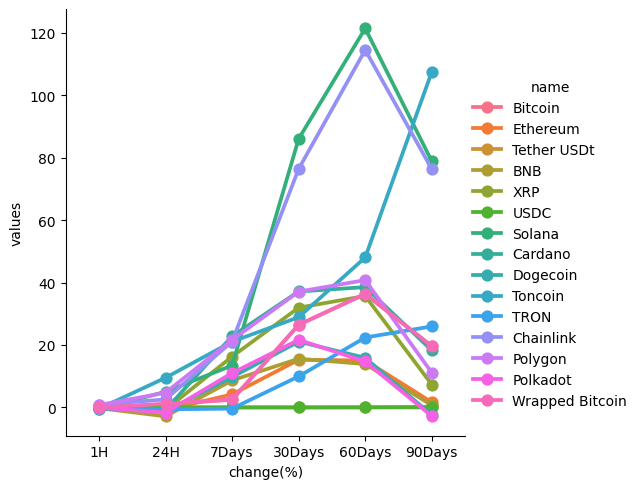

In [53]:
#VISUALIZE THE DATA - plotting graph
import seaborn as sns
import matplotlib.pyplot as plt

#x-axis = change(%), y-axis = values, hue(legend) = name of the coin
#data(which dataframe to use) = df7, kind(type of graph) = point
sns.catplot(x = 'change(%)', y = 'values', hue='name', data = df7, kind = 'point')

In [57]:
#creating a df with the columns we want
df10 = df[['name','quote.USD.price']]
df10 = df10.query('name == "Bitcoin"')
df10

,name,quote.USD.price
0,Bitcoin,35267.070017
0,Bitcoin,35267.070017
